<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/49_Examen_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [23]:
vino = load_wine()

print(vino.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
data = [pd.DataFrame(vino.data), pd.DataFrame(vino.target)]

data = pd.concat(data, axis=1, ignore_index= True)

columns = vino.feature_names + ['target']

data.columns = columns

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
print(data.target.value_counts())

data[data.target == 0].head()

1    71
0    59
2    48
Name: target, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


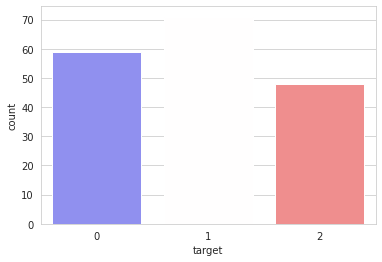

In [27]:
sns.countplot(x=data.target, data=data, palette='bwr'); plt.show()

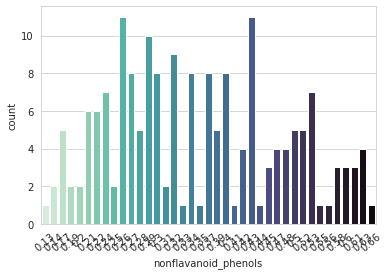

In [28]:

sns.countplot(x=data.nonflavanoid_phenols, data=data, palette='mako_r'); plt.xticks(rotation=40); plt.show()

In [32]:
class_0 = len(data[data.target == 0])
class_1 = len(data[data.target == 1]); class_2 = len(data[data.target == 2])

print('Percentage of class 0: {:.2f}'.format((class_0 / len(data.target)) * 100))
print('Percentage of class 1: {:.2f}'.format((class_1 / len(data.target)) * 100))
print('Percentage of class 2: {:.2f}'.format((class_2 / len(data.target)) * 100))

data.groupby('target').mean()



Percentage of class 0: 33.15
Percentage of class 1: 39.89
Percentage of class 2: 26.97


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


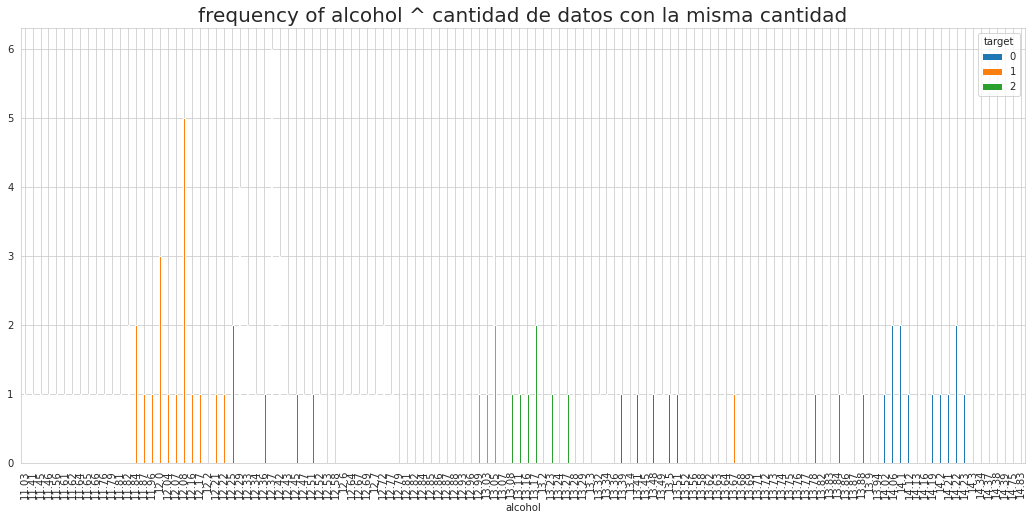

In [34]:
pd.crosstab(data.alcohol, data.target).plot(kind='bar',figsize=(18,8))
plt.title('frequency of alcohol ^ cantidad de datos con la misma cantidad', size=20); plt.show()

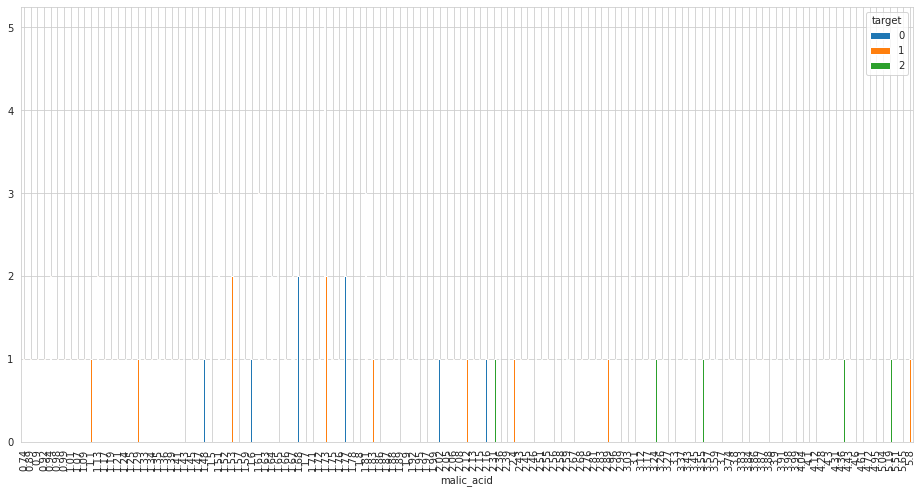

In [35]:
pd.crosstab(data.malic_acid, data.target).plot(kind='bar', figsize=(16,8))

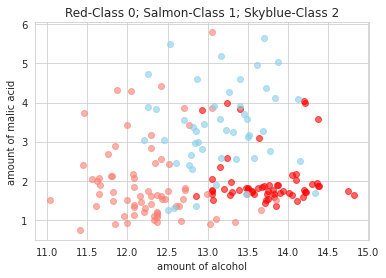

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(data.alcohol[data.target == 0], data.malic_acid[data.target == 0], c='red', alpha=.6)
plt.scatter(data.alcohol[data.target == 1], data.malic_acid[data.target == 1], c='salmon', alpha=.6)
plt.scatter(data.alcohol[data.target == 2], data.malic_acid[data.target == 2], c='skyblue', alpha=.6)
plt.xlabel('amount of alcohol'); plt.ylabel('amount of malic acid'); plt.title('Red-Class 0; Salmon-Class 1; Skyblue-Class 2') 
plt.figure('equal')
plt.show()

In [38]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [39]:
y = data.target

x_data = data.drop(['target'], axis=1)

# Normalie data

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
print(x.shape)
x.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)
X_train = X_train.T 
X_test = X_test.T 
y_train = y_train.T 
y_test = y_test.T


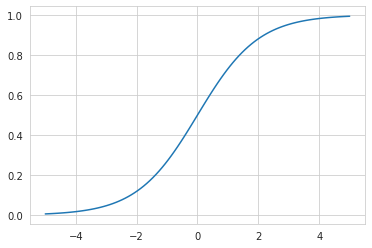

In [40]:
def initialize(dimension):

  weight = np.full((dimension, 1), .01)
  bias = 0.0

  return weight, bias

def fun_act(z):

  sigm = 1 / (1 + np.exp(-z))

  return sigm

def fun_relu(z):

  relu = np.maximum(0, z)

  return relu

_x = np.linspace(-5,5,100)

plt.plot(_x, fun_act(_x))
plt.show()

In [41]:
def ForwardBackward(X_train, y_train, weight, bias):

  # Forward Pass
  # Funcion de activacion
  act_f = fun_act(np.dot(weight.T, X_train) + bias)

  # Funcion de coste
  loss = -(y_train * np.log(act_f)) + (1 - y_train) * (np.log(1 - act_f))

  # Suma de costes
  sum_cost = np.sum(loss) / len(X_train.shape[1])
  #---> End Forward Pass

  # Backward Pass
  derivative_weight = np.dot(X_train, (act_f - y_train).T) / X_train.shape[1]
  derivative_bias = np.sum(act_f - y_train) / X_train.shape[1]
  gradients = {'Derivative Weights': derivative_weight, 'Derivative Bias': derivative_bias}

  return sum_cost, gradients

In [42]:
def Update(X_train, y_train, weight, bias, lr, iteration):

  costList = []
  
  index = []

  # For each iteration, update weigh and bias value
  for _ in range(iteration):

    cost, gradients = ForwardBackward(weight, bias, X_train, y_train)

    weight = weight - lr * gradients['Derivative Weights']

    bias = bias - lr * gradients['Derivative Bias']

    costList.append(cost)

    index.append(_)

  parameters = {'weight':weight, 'bias':bias}

  print('Iteration',iteration)
  print('Cost',cost)

  plt.plot(index, costList)
  plt.xlabel('number of iteraction')
  plt.ylabel('cost')
  plt.show()

  return parameters, gradients

In [43]:
def predict(weight, bias, X_test):

  z = np.dot(weight.T, X_test) + bias

  f_act = fun_act(z)

  y_prediction = np.zeros((1, X_test.shape[1]))

  for _ in range(f_act.shape[1]):
    
    if _ <= .5:

      y_prediction[0,_] == 0
    
    else:

      y_prediction[0,_] == 1

  return y_prediction

In [46]:
def logistic_regression(X_train, y_train, X_test, y_test, lr=0.5, iteration):

  dimension = X_train.shape[1]

  weight, bias = initialize(dimension)

  parameters, gradients = Update(X_train, y_train, weight, bias, lr, iteration)

  y_prediction = predict(parameters['weight'], parameters['bias'], X_test)

  print('Test accuracy {:.2f}'.format((100 - np.mean(np.abs(y_prediction - y_test)) * 100))

logistic_regression(X_train, y_train, X_test, y_test, 0.5, 100)

SyntaxError: ignored

In [48]:
from sklearn.neighbors import KNeighborsClassifier

n_setting = range(1,11)
knn_test = []
knn_train = []
knn_index = []

for i, _i in enumerate(n_setting):

  knn = KNeighborsClassifier(n_neighbors=_i).fit(X_train.T, y_train.T)
  knn_test.append(knn.score(X_test.T, y_test.T))
  knn_train.append(knn.score(X_train.T, y_train.T))
  knn_index.append(_i)

df_knn = pd.DataFrame(data=[knn_index, knn_train, knn_test]).T
df_knn.columns = ['N-neighbors', 'Train accuracy', 'Test accuracy']
n_min = df_knn[df_knn['Test accuracy'] == max(df_knn['Test accuracy'])]
n_min = n_min[n_min['Train accuracy'] == min(n_min['Train accuracy'])]

_knn = KNeighborsClassifier(n_neighbors=int(n_min['N-neighbors'])).fit(X_train.T, y_train.T)

acc_1 = round(_knn.score(X_test.T, y_test.T) * 100,2)
acc_2 = round(_knn.score(X_train.T, y_train.T) * 100, 2)

acc_test = {}

acc_train = {}

acc_test['KNeighbors Test'] = acc_1

acc_train['KNeighbors Train'] = acc_2

models = ()

models = models + (_knn,)

acc_test, acc_train
n_min['N-neighbors']

6    7.0
Name: N-neighbors, dtype: float64

In [49]:
from sklearn.linear_model import LogisticRegression

c_setting = np.linspace(0.1, 1, 10)

lr_test = []
lr_train = []
lr_index = []

for i, _i in enumerate(c_setting):

  lr = LogisticRegression(C=_i).fit(X_train.T, y_train.T)
  
  lr_test.append(lr.score(X_test.T, y_test.T))
  lr_train.append(lr.score(X_train.T, y_train.T))
  lr_index.append(_i)

df_lr = pd.DataFrame(data=[lr_index, lr_train, lr_test]).T
df_lr.columns = ['C', 'Train accuracy', 'Test accuracy']
c_min = df_lr[df_lr['Train accuracy'] == min(df_lr['Train accuracy'])]
c_min

lr = LogisticRegression(C=float(c_min['C'])).fit(X_train.T, y_train.T)

acc_1 = round(lr.score(X_test.T, y_test.T), 2) * 100
acc_2 = round(lr.score(X_train.T, y_train.T), 2) * 100

acc_test['LogisticRegression Test'] = acc_1
acc_train['LogisticRegression Train'] = acc_2

models += (lr,)
acc_test, acc_train

({'KNeighbors Test': 97.22, 'LogisticRegression Test': 94.0},
 {'KNeighbors Train': 95.77, 'LogisticRegression Train': 97.0})

In [50]:
from sklearn.svm import SVC

c_setting = np.linspace(0.1,1,10)
svc_test = []
svc_train =[]
svc_index =[]

for i, _i in enumerate(c_setting):
  
  svm = SVC(C=_i).fit(X_train.T, y_train.T)
  svc_test.append(svm.score(X_test.T, y_test.T))
  svc_train.append(svm.score(X_train.T, y_train.T))
  svc_index.append(_i)

df_svc = pd.DataFrame(data=[svc_index, svc_train, svc_test]).T
df_svc.columns = ['C', 'Test Accuracy', 'Train Accuracy']
df_svc.head()

df_svc[df_svc['Test Accuracy'] == max(df_svc['Test Accuracy'])]
c_min = df_svc[df_svc['Train Accuracy'] == min(df_svc['Train Accuracy'])]
c_min = c_min.iloc[0,0]


c_min

svm = SVC(C=c_min).fit(X_train.T, y_train.T)

train_s = round(svm.score(X_train.T, y_train.T) * 100,2)
test_s = round(svm.score(X_test.T, y_test.T) * 100,2)

acc_train['SVC Train'] = train_s
acc_test['SVC Test'] = test_s

acc_test, acc_train

models += (svm,)

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train.T, y_train.T)
acc = round(nb.score(X_train.T, y_train.T) * 100, 2)
acc_1 = round(nb.score(X_test.T, y_test.T) * 100,2)
acc_train['GaussianNB Train'] = acc
acc_test['GaussianNB Test'] = acc_1

acc_test, acc_train

models += (nb,)

models

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                      weights='uniform'),
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split

In [51]:
from sklearn.tree import DecisionTreeClassifier

d_setting = range(1,11)
test_dtc = []
train_dtc = []
index_dtc = []

for i, _i in enumerate(d_setting):

  tree = DecisionTreeClassifier(max_depth=_i).fit(X_train.T, y_train.T)
  test_dtc.append(tree.score(X_test.T, y_test.T))
  train_dtc.append(tree.score(X_train.T, y_train.T))
  index_dtc.append(_i)
  
df_tree = pd.DataFrame(data=[index_dtc, train_dtc, test_dtc]).T
df_tree.columns = ['Max Depth', 'Train', 'Test']


df_tree[df_tree['Test'] == max(df_tree['Test'])]
df_tree[df_tree['Train'] == min(df_tree['Train'])]
df_tree

dtc = DecisionTreeClassifier(max_depth = 2).fit(X_train.T, y_train.T)

acc = round(dtc.score(X_test.T, y_test.T) * 100, 2)
acc_1 = round(dtc.score(X_train.T, y_train.T) * 100, 2)

acc_test['DecisionTreeClassifier'] = acc
acc_train['DecisionTreeClassifier'] = acc_1

acc_test, acc_train

models += (dtc,)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=2).fit(X_train.T, y_train.T)

acc = round(rfc.score(X_test.T, y_test.T) * 100, 2)
acc_1 = round(rfc.score(X_train.T, y_train.T) * 100, 2)

acc_test['Random Forest Classifier Test'] = acc
acc_train['RandomForestClassifeir'] = acc_1

print('Test accuracy Random Forest Classifier {:.2f}%'.format(acc))

acc_test, acc_train

models += (rfc,)

Test accuracy Random Forest Classifier 97.22%


In [55]:
df_score = pd.DataFrame(data=[acc_test.keys(), acc_train.values(),acc_test.values()]).T
df_score.columns = ['Model', 'Train Score', 'Test Score']

df_score

,Model,Train Score,Test Score
0,KNeighbors Test,95.77,97.22
1,LogisticRegression Test,97,94
2,SVC Test,98.59,97.22
3,DecisionTreeClassifier,92.96,86.11
4,Random Forest Classifier Test,99.3,97.22
5,GaussianNB Test,98.59,100


In [ ]:
models

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


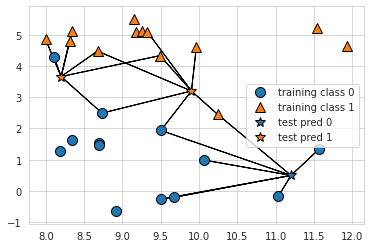

In [57]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=7)
  

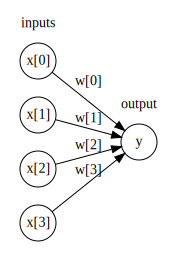

In [58]:
mglearn.plots.plot_logistic_regression_graph()

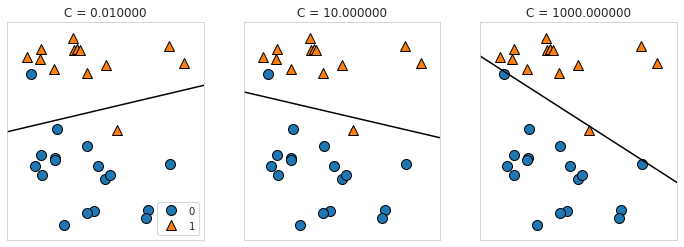

In [59]:
mglearn.plots.plot_linear_svc_regularization()

In [60]:
acc_train

{'DecisionTreeClassifier': 92.96,
 'GaussianNB Train': 98.59,
 'KNeighbors Train': 95.77,
 'LogisticRegression Train': 97.0,
 'RandomForestClassifeir': 99.3,
 'SVC Train': 98.59}

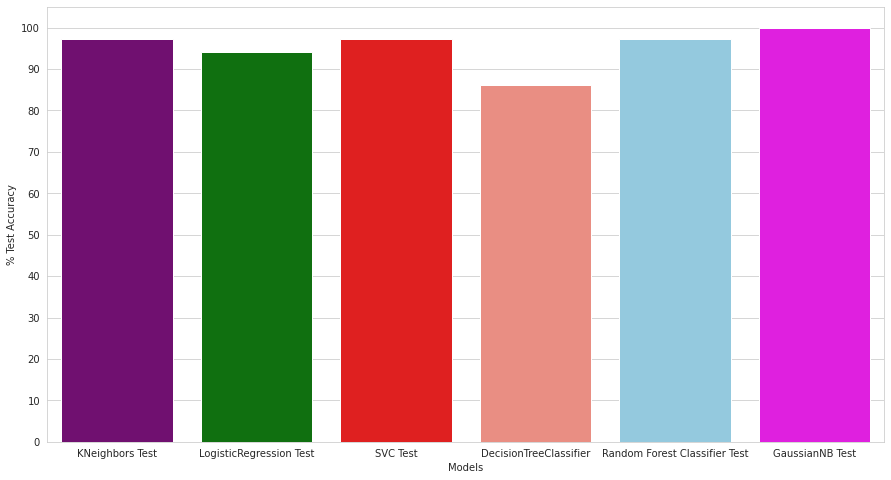

In [64]:
colors = ['purple', 'green', 'red','salmon', 'skyblue', 'magenta']

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.xlabel('Models')
plt.ylabel('% Test Accuracy')
plt.yticks(np.arange(0,110,10))
sns.barplot(x=list(acc_test.keys()), y=list(acc_test.values()), palette=colors)
plt.show()



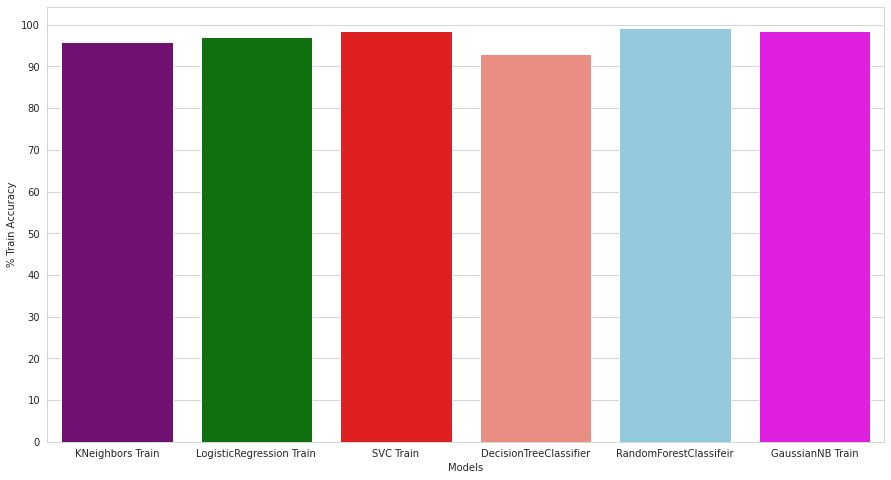

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.xlabel('Models')
plt.ylabel('% Train Accuracy')
plt.yticks(np.arange(0,110,10))
sns.barplot(x=list(acc_train.keys()), y=list(acc_train.values()), palette=colors)
plt.show()

In [68]:
y_head_lr = lr.predict(X_test.T)
y_head_knn = knn.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rfc = rfc.predict(X_test.T)

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test.T, y_head_lr)
cm_knn = confusion_matrix(y_test.T, y_head_knn)
cm_svm = confusion_matrix(y_test.T, y_head_svm)
cm_nb = confusion_matrix(y_test.T, y_head_nb)
cm_dtc = confusion_matrix(y_test.T, y_head_dtc)
cm_rfc = confusion_matrix(y_test.T, y_head_rfc)


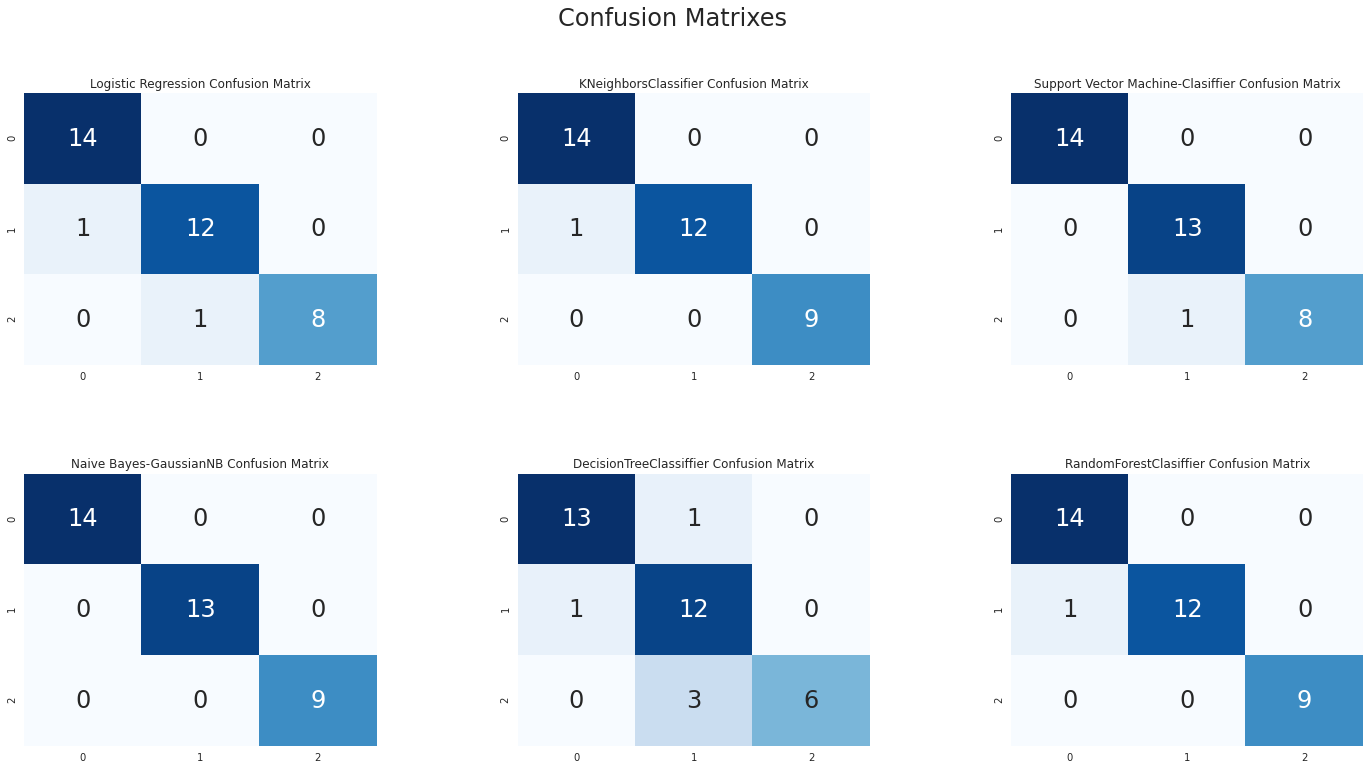

In [80]:
plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrixes', size=24)
plt.subplots_adjust(wspace=.4, hspace=.4)

plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, cmap='Blues', annot=True, fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,3,2)
plt.title('KNeighborsClassifier Confusion Matrix')
sns.heatmap(cm_knn, cmap='Blues', annot=True, fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2,3,3)
plt.title('Support Vector Machine-Clasiffier Confusion Matrix')
sns.heatmap(cm_svm, cmap='Blues', cbar=False, annot=True, annot_kws={'size':24}, fmt='d')

plt.subplot(2,3,4)
plt.title('Naive Bayes-GaussianNB Confusion Matrix')
sns.heatmap(cm_nb, annot=True, cbar=False, cmap='Blues', annot_kws={'size':24}, fmt='d')

plt.subplot(2,3,5)
plt.title('DecisionTreeClassiffier Confusion Matrix')
sns.heatmap(cm_dtc, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'size':24})

plt.subplot(2,3,6)
plt.title('RandomForestClasiffier Confusion Matrix')
sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, annot_kws={'size':24}, fmt='d')

plt.show()